In [18]:
import pandas as pd

# Load training set and handcrafted features
training_set = pd.read_csv('training_set_rel3.tsv', sep='\t',encoding='ISO-8859-1')
handcrafted = pd.read_csv('hand_crafted_v3.csv')
prompt_info = pd.read_csv('prompt_info.csv')




In [19]:
# Initialize an empty list to store prompt dataframes
prompt_dfs = []

# Loop through all prompt files and load them
for i in range(1, 7):
    prompt_df = pd.read_csv(f'Prompt-{i}.csv')
    prompt_df['prompt_id'] = i  # Add a column for prompt_id
    prompt_dfs.append(prompt_df)

# Concatenate all the prompt data into a single dataframe
all_prompt_scores = pd.concat(prompt_dfs, ignore_index=True)

In [20]:
all_prompt_scores

,EssayID,Content,Organization,Word Choice,Sentence Fluency,Conventions,prompt_id,Prompt Adherence,Language,Narrativity
0,1,4,3.0,3.0,3.0,3.0,1,NaN,NaN,NaN
1,2,4,4.0,4.0,3.0,4.0,1,NaN,NaN,NaN
2,3,3,3.0,3.0,4.0,4.0,1,NaN,NaN,NaN
3,4,5,4.0,5.0,4.0,4.0,1,NaN,NaN,NaN
4,5,4,3.0,4.0,4.0,4.0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10681,16601,1,NaN,NaN,NaN,NaN,6,1.0,2.0,2.0
10682,16602,3,NaN,NaN,NaN,NaN,6,2.0,2.0,2.0
10683,16603,1,NaN,NaN,NaN,NaN,6,1.0,2.0,2.0
10684,16606,1,NaN,NaN,NaN,NaN,6,1.0,1.0,1.0


In [21]:
# Merge training set with handcrafted features on 'essay_id'
merged_data = pd.merge(training_set, handcrafted, left_on='essay_id', right_on='item_id', how='left')

# Merge with prompt scores using 'essay_id' and 'prompt_id'
merged_data = pd.merge(merged_data, all_prompt_scores, left_on=['essay_id', 'essay_set'], right_on=['EssayID', 'prompt_id'], how='left')

# Merge with prompt information
merged_data = pd.merge(merged_data, prompt_info, left_on='essay_set', right_on='prompt_id', how='left')


In [22]:
merged_data.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'item_id',
       'prompt_id_x', 'mean_word', 'word_var', 'mean_sent', 'sent_var',
       'ess_char_len', 'word_count', 'prep_comma', 'unique_word',
       'clause_per_s', 'mean_clause_l', 'max_clause_in_s', 'spelling_err',
       'sent_ave_depth', 'ave_leaf_depth', 'automated_readability',
       'linsear_write', 'stop_prop', 'positive_sentence_prop',
       'negative_sentence_prop', 'neutral_sentence_prop',
       'overall_positivity_score', 'overall_negativity_score', ',', '.', '

In [23]:
merged_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,Organization,Word Choice,Sentence Fluency,Conventions,prompt_id_y,Prompt Adherence,Language,Narrativity,prompt_id,prompt
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,1.0,NaN,NaN,NaN,1,"More and more people use computers, but not ev..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,4.0,4.0,3.0,4.0,1.0,NaN,NaN,NaN,1,"More and more people use computers, but not ev..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,3.0,3.0,4.0,4.0,1.0,NaN,NaN,NaN,1,"More and more people use computers, but not ev..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,4.0,5.0,4.0,4.0,1.0,NaN,NaN,NaN,1,"More and more people use computers, but not ev..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,3.0,4.0,4.0,4.0,1.0,NaN,NaN,NaN,1,"More and more people use computers, but not ev..."


In [25]:
# List of columns to remove
cols_to_remove = [
    'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6',
    'rater2_trait1', 'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
    'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5', 'rater3_trait6',
    'rater3_domain1','rater1_domain2','rater2_domain2','domain2_score',
    'prompt_id','prompt_id_y','EssayID'
]

# Drop the columns
merged_data = merged_data.drop(columns=cols_to_remove)


In [26]:
merged_data.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'domain1_score', 'item_id', 'prompt_id_x', 'mean_word', 'word_var',
       'mean_sent', 'sent_var', 'ess_char_len', 'word_count', 'prep_comma',
       'unique_word', 'clause_per_s', 'mean_clause_l', 'max_clause_in_s',
       'spelling_err', 'sent_ave_depth', 'ave_leaf_depth',
       'automated_readability', 'linsear_write', 'stop_prop',
       'positive_sentence_prop', 'negative_sentence_prop',
       'neutral_sentence_prop', 'overall_positivity_score',
       'overall_negativity_score', ',', '.', 'VB', 'JJR', 'WP', 'PRP$', 'VBN',
       'VBG', 'IN', 'CC', 'JJS', 'PRP', 'MD', 'WRB', 'RB', 'VBD', 'RBR', 'VBZ',
       'NNP', 'POS', 'WDT', 'DT', 'CD', 'NN', 'TO', 'JJ', 'VBP', 'RP', 'NNS',
       'score', 'Content', 'Organization', 'Word Choice', 'Sentence Fluency',
       'Conventions', 'Prompt Adherence', 'Language', 'Narrativity', 'prompt'],
      dtype='object')

In [27]:
merged_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,item_id,prompt_id_x,mean_word,word_var,...,score,Content,Organization,Word Choice,Sentence Fluency,Conventions,Prompt Adherence,Language,Narrativity,prompt
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8,1,1,4.400593,5.842492,...,8.0,4.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,2,1,4.353222,5.469506,...,9.0,4.0,4.0,4.0,3.0,4.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,3,1,4.405018,5.545638,...,7.0,3.0,3.0,3.0,4.0,4.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,4,1,4.868321,6.415867,...,10.0,5.0,4.0,5.0,4.0,4.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,5,1,4.408602,5.450249,...,8.0,4.0,3.0,4.0,4.0,4.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."


In [28]:
# Calculate the percentage of missing values for each column
missing_percentage = merged_data.isnull().mean() * 100

# Display the missing percentages sorted by the most missing data
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)


Organization        72.389612
Word Choice         72.389612
Sentence Fluency    72.389612
Conventions         72.389612
Language            45.280111
Prompt Adherence    45.280111
Narrativity         45.280111
Content             17.669723
dtype: float64


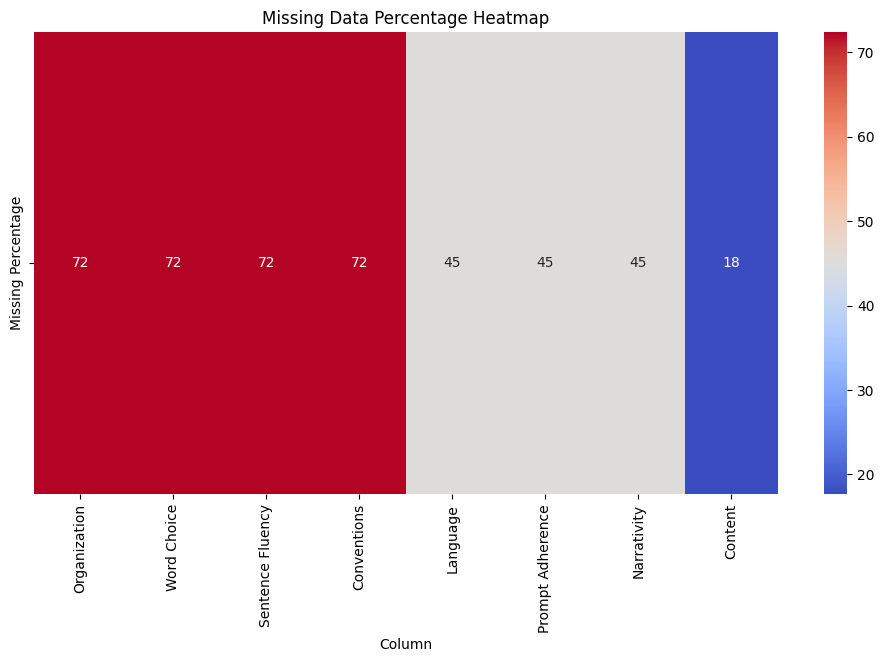

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the missing percentages
missing_percentage_df = missing_percentage.to_frame().reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap for missing percentage
sns.heatmap(missing_percentage_df.set_index('Column').T, cmap='coolwarm', annot=True, cbar=True)

# Show the plot
plt.title('Missing Data Percentage Heatmap')
plt.show()


In [31]:
merged_data.to_csv('combined_scores.csv', index=False)


In [51]:
data = merged_data

In [42]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set the width of the display

# Generate descriptive statistics for numerical columns
numerical_desc = data.describe()

# Generate descriptive statistics for categorical columns
categorical_desc = data.describe(include='object')

# Display the results
print("Numerical Descriptive Statistics:")
numerical_desc


Numerical Descriptive Statistics:


,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score,item_id,prompt_id_x,mean_word,word_var,mean_sent,sent_var,ess_char_len,word_count,prep_comma,unique_word,clause_per_s,mean_clause_l,max_clause_in_s,spelling_err,sent_ave_depth,ave_leaf_depth,automated_readability,linsear_write,stop_prop,positive_sentence_prop,negative_sentence_prop,neutral_sentence_prop,overall_positivity_score,overall_negativity_score,",",.,VB,JJR,WP,PRP$,VBN,VBG,IN,CC,JJS,PRP,MD,WRB,RB,VBD,RBR,VBZ,NNP,POS,WDT,DT,CD,NN,TO,JJ,VBP,RP,NNS,score,Content,Organization,Word Choice,Sentence Fluency,Conventions,Prompt Adherence,Language,Narrativity
count,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,10684.000000,3583.000000,3583.000000,3583.000000,3583.000000,7101.000000,7101.000000,7101.000000
mean,10294.938044,4.179317,4.127302,4.137474,6.800185,10294.938044,4.179317,4.313948,4.689840,20.319405,106.269575,959.212761,222.534099,32.942205,77.328196,0.322341,6.051147,1.206134,15.102258,5.168428,2.625442,10.513670,12.152758,0.488127,0.422757,0.268888,0.308354,0.457404,0.057324,0.025922,0.049838,0.047755,0.002687,0.003600,0.018462,0.013182,0.020370,0.099905,0.031751,0.001559,0.064321,0.016799,0.009660,0.047687,0.041032,0.001338,0.029063,0.039025,0.001678,0.004185,0.097686,0.003898,0.137023,0.029722,0.055183,0.025839,0.005061,0.046738,6.800031,2.229221,3.388780,3.394083,3.546749,3.433715,1.594142,1.709900,1.660893
std,6309.046506,2.136916,4.212414,4.264172,8.970362,6309.046506,2.136916,0.350082,1.218612,12.114453,387.720243,751.748167,175.917114,28.191164,43.704907,0.387148,4.292084,0.834187,14.784997,1.280130,0.567333,7.617173,6.454864,0.052958,0.279382,0.252582,0.234181,0.395039,0.109436,0.020240,0.021691,0.024408,0.005077,0.005939,0.016955,0.011353,0.014511,0.026033,0.017096,0.003297,0.035742,0.014111,0.010556,0.022204,0.036025,0.003536,0.025425,0.045534,0.004482,0.005932,0.036927,0.006020,0.036966,0.017066,0.022412,0.023985,0.006578,0.028905,8.970444,1.413076,1.100153,1.084580,1.032947,1.063323,1.030132,1.011093,0.992609
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.900000,0.687500,2.000000,0.000000,7.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,-1.900000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4438.000000,2.000000,2.000000,2.000000,2.000000,4438.000000,2.000000,4.093750,3.841692,14.823529,27.876543,418.000000,98.000000,13.000000,46.000000,0.125000,3.666667,1.000000,6.000000,4.372093,2.264151,7.300000,8.000000,0.453333,0.214286,0.000000,0.142857,0.000000,0.000000,0.009597,0.038462,0.030651,0.000000,0.000000,0.004754,0.004808,0.010638,0.084211,0.020270,0.000000,0.037975,0.006192,0.000000,0.033333,0.010101,0.000000,0.010309,0.010929,0.000000,0.000000,0.070681,0.000000,0.112360,0.018797,0.041322,0.006173,0.000000,0.024691,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000
50%,10044.000000,4.0000

In [43]:

print("\nCategorical Descriptive Statistics:")
categorical_desc



Categorical Descriptive Statistics:


,essay,prompt,xml_prompt
count,12977,12977,12977
unique,12972,8,12977
top,The common phrase 'knowledge is power' accurat...,Describe the mood created by the author in the...,<essay><essay_id>21633</essay_id><essay_set>8<...
freq,2,1805,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   essay_id                  12977 non-null  int64  
 1   essay_set                 12977 non-null  int64  
 2   essay                     12977 non-null  object 
 3   rater1_domain1            12977 non-null  int64  
 4   rater2_domain1            12977 non-null  int64  
 5   domain1_score             12977 non-null  int64  
 6   item_id                   12977 non-null  int64  
 7   prompt_id_x               12977 non-null  int64  
 8   mean_word                 12977 non-null  float64
 9   word_var                  12977 non-null  float64
 10  mean_sent                 12977 non-null  float64
 11  sent_var                  12977 non-null  float64
 12  ess_char_len              12977 non-null  int64  
 13  word_count                12977 non-null  int64  
 14  prep_c

In [52]:
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,item_id,prompt_id_x,mean_word,word_var,mean_sent,sent_var,ess_char_len,word_count,prep_comma,unique_word,clause_per_s,mean_clause_l,max_clause_in_s,spelling_err,sent_ave_depth,ave_leaf_depth,automated_readability,linsear_write,stop_prop,positive_sentence_prop,negative_sentence_prop,neutral_sentence_prop,overall_positivity_score,overall_negativity_score,",",.,VB,JJR,WP,PRP$,VBN,VBG,IN,CC,JJS,PRP,MD,WRB,RB,VBD,RBR,VBZ,NNP,POS,WDT,DT,CD,NN,TO,JJ,VBP,RP,NNS,score,Content,Organization,Word Choice,Sentence Fluency,Conventions,Prompt Adherence,Language,Narrativity,prompt
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8,1,1,4.400593,5.842492,21.062500,171.308594,1483,337,71,117,0.437500,8.000000,2,26,5.687500,3.075567,11.3,11.200000,0.483680,0.750000,0.000000,0.250000,0.602912,0.0,0.046392,0.041237,0.059278,0.002577,0.002577,0.030928,0.010309,0.036082,0.136598,0.036082,0.000000,0.074742,0.012887,0.010309,0.059278,0.002577,0.000000,0.036082,0.028351,0.002577,0.000000,0.051546,0.000000,0.144330,0.025773,0.048969,0.030928,0.007732,0.043814,8.0,4.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,2,1,4.353222,5.469506,20.950000,142.247500,1824,419,70,125,0.250000,7.800000,1,33,6.200000,3.414847,10.1,12.200000,0.539379,0.700000,0.000000,0.300000,0.548890,0.0,0.025751,0.042918,0.062232,0.002146,0.000000,0.017167,0.010730,0.042918,0.124464,0.038627,0.002146,0.072961,0.034335,0.019313,0.036481,0.017167,0.000000,0.012876,0.032189,0.000000,0.002146,0.075107,0.008584,0.122318,0.017167,0.042918,0.036481,0.004292,0.087983,9.0,4.0,4.0,4.0,3.0,4.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,3,1,4.405018,5.545638,19.928571,184.637755,1229,279,41,113,0.142857,16.500000,1,11,5.571429,2.990260,9.8,7.857143,0.498208,0.714286,0.142857,0.142857,0.696043,0.0,0.028571,0.044444,0.041270,0.009524,0.015873,0.006349,0.000000,0.028571,0.101587,0.050794,0.003175,0.044444,0.012698,0.009524,0.038095,0.003175,0.003175,0.019048,0.038095,0.000000,0.000000,0.085714,0.006349,0.123810,0.025397,0.047619,0.076190,0.009524,0.111111,7.0,3.0,3.0,3.0,4.0,4.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,4,1,4.868321,6.415867,19.407407,135.722908,2551,524,77,179,0.222222,9.333333,2,81,4.740741,2.507745,15.2,15.500000,0.572519,0.629630,0.000000,0.370370,0.675530,0.0,0.021104,0.043831,0.048701,0.006494,0.004870,0.012987,0.012987,0.008117,0.103896,0.027597,0.009740,0.024351,0.022727,0.006494,0.043831,0.029221,0.001623,0.019481,0.115260,0.003247,0.003247,0.069805,0.000000,0.126623,0.024351,0.066558,0.040584,0.001623,0.086039,10.0,5.0,4.0,5.0,4.0,4.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,5,1,4.408602,5.450249,15.500000,43.516667,2050,465,56,128,0.433333,5.230769,2,25,4.733333,2.403846,7.7,10.666667,0.483871,0.533333,0.133333,0.333333,0.804980,0.0,0.025048,0.057803,0.080925,0.015414,0.001927,0.007707,0.003854,0.011561,0.082852,0.028902,0.001927,0.046243,0.050096,0.009634,0.069364,0.003854,0.003854,0.030829,0.011561,0.000000,0.005780,0.104046,0.009634,0.131021,0.040462,0.042389,0.036609,0.001927,0.078998,8.0,4.0,3.0,4.0,4.0,4.0,NaN,NaN,NaN,"More and more people use computers, but not ev..."


In [55]:
# Load the dataset
df =data

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Drop specific columns
numerical_cols = numerical_cols.drop(['essay_id', 'essay_set'], errors='ignore')

print(numerical_cols)

# Calculate Z-scores for the numerical columns
z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Create a DataFrame for Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numerical_cols)

# Optional: Add the non-numerical columns back to the Z-scores DataFrame
non_numerical_df = df.drop(columns=numerical_cols)
final_z_scores_df = pd.concat([non_numerical_df, z_scores_df], axis=1)

# Display the Z-scores DataFrame
print(final_z_scores_df.head())

# Optional: Save the Z-scores to a new CSV file
final_z_scores_df.to_csv('z_score_combined_score.csv', index=False)


Index(['rater1_domain1', 'rater2_domain1', 'domain1_score', 'item_id', 'prompt_id_x', 'mean_word', 'word_var', 'mean_sent', 'sent_var', 'ess_char_len', 'word_count', 'prep_comma', 'unique_word', 'clause_per_s', 'mean_clause_l', 'max_clause_in_s', 'spelling_err', 'sent_ave_depth', 'ave_leaf_depth', 'automated_readability', 'linsear_write', 'stop_prop', 'positive_sentence_prop', 'negative_sentence_prop', 'neutral_sentence_prop', 'overall_positivity_score', 'overall_negativity_score', ',', '.', 'VB', 'JJR', 'WP', 'PRP$', 'VBN', 'VBG', 'IN', 'CC', 'JJS', 'PRP', 'MD', 'WRB', 'RB', 'VBD', 'RBR', 'VBZ', 'NNP', 'POS', 'WDT', 'DT', 'CD', 'NN', 'TO', 'JJ', 'VBP', 'RP', 'NNS', 'score', 'Content', 'Organization', 'Word Choice', 'Sentence Fluency', 'Conventions', 'Prompt Adherence', 'Language', 'Narrativity'], dtype='object')
   essay_id  essay_set                                              essay                                             prompt  rater1_domain1  rater2_domain1  domain1_score   i

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np

# Load the data
data = pd.read_csv('z_score_combined_score.csv')


def create_xml_prompt(row):
    # Create the root element
    essay = ET.Element("essay")
    
    # Create sub-elements for each column
    for col in row.index:
        value = row[col]
        
        # Convert integers to null and strings to NA as specified
        if pd.isnull(value):
            continue
            # value_element = ET.SubElement(essay, col)
            # value_element.text = "NA"  # For string columns
        elif isinstance(value, (int, float)):
            value_element = ET.SubElement(essay, col)
            value_element.text = str(value) if value is not None else "null"  # For integer/float
        else:
            value_element = ET.SubElement(essay, col)
            value_element.text = str(value)  # Handle other types
            
    # Convert the XML element tree to a string
    return ET.tostring(essay, encoding='unicode')


# Generate XML for each row
data['xml_prompt'] = data.apply(create_xml_prompt, axis=1)

# Display the first few XML prompts
print(data['xml_prompt'])



0        <essay><essay_id>1</essay_id><essay_set>1</ess...
1        <essay><essay_id>2</essay_id><essay_set>1</ess...
2        <essay><essay_id>3</essay_id><essay_set>1</ess...
3        <essay><essay_id>4</essay_id><essay_set>1</ess...
4        <essay><essay_id>5</essay_id><essay_set>1</ess...
                               ...                        
12972    <essay><essay_id>21626</essay_id><essay_set>8<...
12973    <essay><essay_id>21628</essay_id><essay_set>8<...
12974    <essay><essay_id>21629</essay_id><essay_set>8<...
12975    <essay><essay_id>21630</essay_id><essay_set>8<...
12976    <essay><essay_id>21633</essay_id><essay_set>8<...
Name: xml_prompt, Length: 12977, dtype: object


In [2]:
data['xml_prompt'][0]

"<essay><essay_id>1</essay_id><essay_set>1</essay_set><essay>Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of tim

In [3]:
data['xml_prompt'][100]

'<essay><essay_id>101</essay_id><essay_set>1</essay_set><essay>Dear Local Newspaper, Have you ever gone somewhere, taken pictures, and posted them on the computer? If you have you will remember where you visited. But atleast you went to @ORGANIZATION1, or @LOCATION1 or somewhere. There are some people who are on the computer all day. Instead of experiencing nature and taken on @CAPS1 life brings to them, they are on facebook or youtube all day. This disgusts me because there are many fun, beautiful, and entertainings things to do. In @CAPS2 opinion I think computers have negative effects on people. People miss out on enjoying nature or interacting with friends and family. Some people do not get exercise anymore and it hurts to see obese people just sit ther and do nothing about there lives. First I\'d like to talk about obesity. Did you know that @PERCENT1 of children are obese at young a young age? Computers take the place of exercising for a young boy or girl. They should go outside 